In [1]:
import kagglehub

path = kagglehub.dataset_download("kyanyoga/sample-sales-data")
print(path)

/opt/miniconda3/envs/bi/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/Users/emanuelalves/.cache/kagglehub/datasets/kyanyoga/sample-sales-data/versions/1


In [2]:
import pandas as pd
import os

csv_path = os.path.join(
    path,
    "sales_data_sample.csv"
)

df = pd.read_csv(csv_path, encoding="latin1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [4]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [5]:
df.isna().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [7]:
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"])

In [8]:
df["YEAR"] = df["ORDERDATE"].dt.year
df["MONTH"] = df["ORDERDATE"].dt.month
df["DAY"] = df["ORDERDATE"].dt.day

In [9]:
pd.options.display.float_format = "{:,.2f}".format

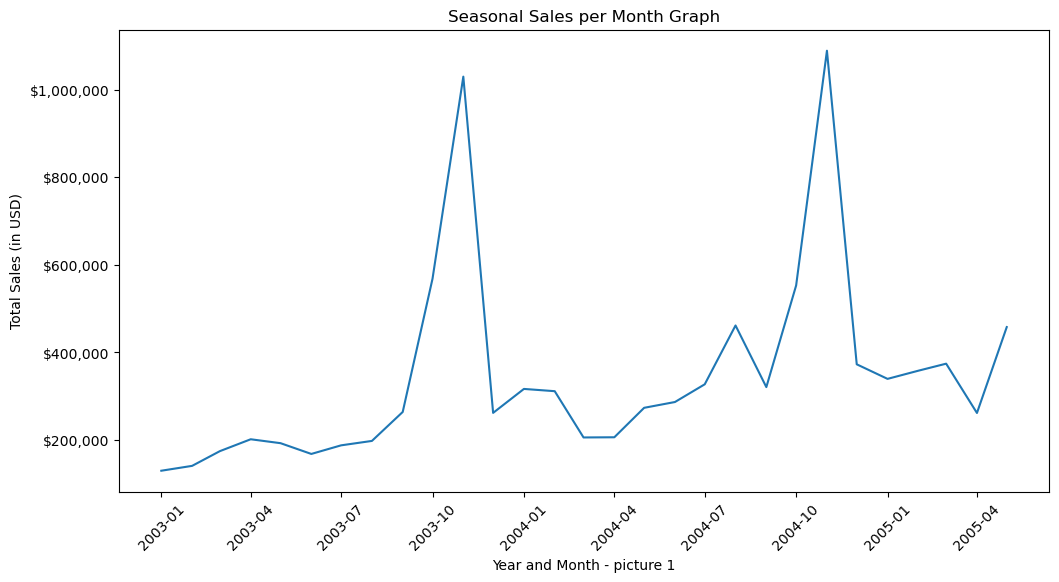

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import matplotlib.dates as mdates

df_time_grouping = df.groupby(["YEAR", "MONTH"])["SALES"].sum().reset_index() # Group by year and month to get total sales
df_time_grouping["YEAR_MONTH"] = pd.to_datetime(df_time_grouping[["YEAR", "MONTH"]].assign(DAY=1)) # Create a date column for plotting
df_time_grouping = df_time_grouping.sort_values("YEAR_MONTH") # Sort

plt.figure(figsize=(12, 6)) # Set figure size for better readability and to limit the number of ticks
plt.plot(df_time_grouping["YEAR_MONTH"], df_time_grouping["SALES"]) # Plot sales over year and month basis
date_year_month_axis = plt.gca() # Get X axis for year-month detail
date_year_month_axis.xaxis.set_major_locator(mdates.MonthLocator(interval=3)) # Set major ticks to every 3 months
date_year_month_axis.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m")) # Format ticks as Year-Month
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
date_year_month_axis.ticklabel_format(style="plain", axis="y") # Disable scientific ntation on y-axis
date_year_month_axis.yaxis.set_major_formatter( 
    FuncFormatter(lambda x, _: f"${x:,.0f}")
) # Format y-axis labels as currency

plt.title("Seasonal Sales per Month Graph")
plt.xlabel("Year and Month - picture 1")
plt.ylabel("Total Sales (in USD)")
plt.show()


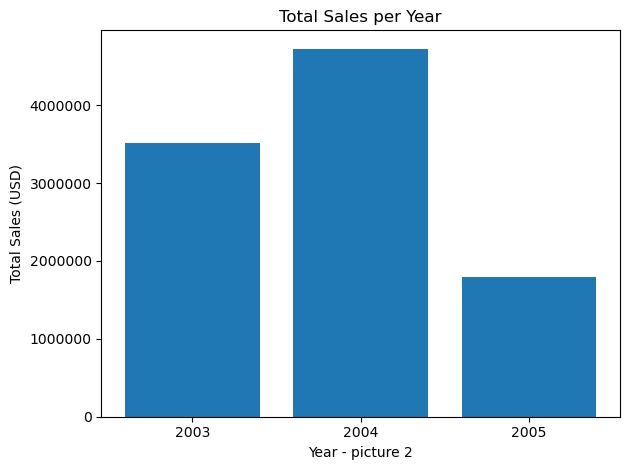

In [13]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 1) Agregar vendas por ano
df_year = (
    df.groupby("YEAR")["SALES"]
    .sum()
    .reset_index()
    .sort_values("YEAR")
)

# 2) Plot (barra é o mais adequado para dados anuais)
# plt.figure(figsize=(10, 5))
plt.bar(df_year["YEAR"], df_year["SALES"])

ax = plt.gca()

# 3) Formatar eixo Y como dinheiro (sem notação científica)
ax.ticklabel_format(style="plain", axis="y")
ax.set_xticks(df_year["YEAR"])
ax.set_xticklabels(df_year["YEAR"].astype(int))

# 4) Labels e título
plt.title("Total Sales per Year")
plt.xlabel("Year - picture 2")
plt.ylabel("Total Sales (USD)")

plt.tight_layout()
plt.show()


In [14]:
print("Sales in dollars per year")
df_year.head()

Sales in dollars per year


,YEAR,SALES
0,2003,"3,516,979.54"
1,2004,"4,724,162.60"
2,2005,"1,791,486.71"


In [15]:
# Will do basic calculation to give year over year growth in decimal
df_year["YOY_GROWTH"] = (
    df_year["SALES"] - df_year["SALES"].shift(1)
) / df_year["SALES"].shift(1)

# Remove rows where YOY_GROWTH is NaN
df_yoy = df_year.dropna(subset=["YOY_GROWTH"]).copy()

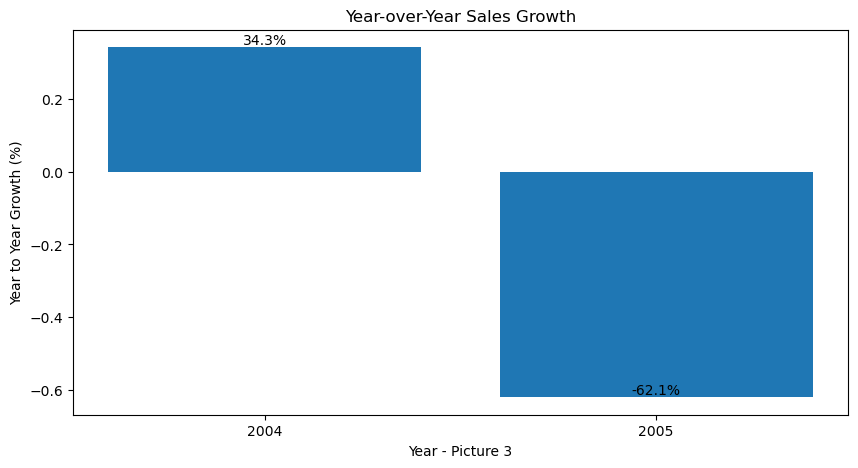

In [16]:
# Set the plot to give the comparison between the two years cleaning the visualization to show percentage and titles

plt.figure(figsize=(10, 5))
plt.bar(df_yoy["YEAR"], df_yoy["YOY_GROWTH"])
ax = plt.gca()
ax.set_xticks(df_yoy["YEAR"])
ax.set_xticklabels(df_yoy["YEAR"].astype(int))
plt.title("Year-over-Year Sales Growth")
plt.xlabel("Year - Picture 3")
plt.ylabel("Year to Year Growth (%)")

for x, y in zip(df_yoy["YEAR"], df_yoy["YOY_GROWTH"]):
    plt.text(
        x,
        y,
        f"{y*100:.1f}%",
        ha="center",
        va="bottom"
    )


##### Picture 3 shows the comparision of year growth in sales considering the whole year. However, in the year 2005 we had limited data about the sales. So, the only data we can trust is that in the year 2004 we had 34.3% growth in sales.

##### We can further compare both years with a trend calculation that we saw in the first picture. We can assume that the year 2005 we will have better numbers in sales using this logic and make other analysis derived from that.